Import Library

In [35]:
import os
import cv2
import numpy as np
from tabulate import tabulate
from sklearn import preprocessing
from skimage.feature import graycomatrix, graycoprops

Directory

In [36]:
image_directory_training="../Dataset/preprocessed_roi_augmentation/2_label/dataset_training"
image_directory_testing="../Dataset/preprocessed_roi_augmentation/2_label/DataSet_Testing"

Ekstraksi Fitur HSV

In [37]:
def ef_hsv_training(image_directory_training):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_training = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_training), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # mengubah gambar ke dalam format HSV
      hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

      # mengambil nilai hue (H) dari gambar
      hue = hsv[:, :, 0]

      # mengambil nilai saturation (S) dari gambar
      saturation = hsv[:, :, 1]

      # mengambil nilai value (V) dari gambar
      value = hsv[:, :, 2]

      # menambahkan nilai HSV ke dalam list
      features_training.append(
          [np.mean(hue), np.mean(saturation), np.mean(value), a])

  return features_training


def ef_hsv_testing(image_directory_testing):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_testing = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_testing), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # mengubah gambar ke dalam format HSV
      hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

      # mengambil nilai hue (H) dari gambar
      hue = hsv[:, :, 0]

      # mengambil nilai saturation (S) dari gambar
      saturation = hsv[:, :, 1]

      # mengambil nilai value (V) dari gambar
      value = hsv[:, :, 2]

      # menambahkan nilai HSV ke dalam list
      features_testing.append(
          [np.mean(hue), np.mean(saturation), np.mean(value), a])

  return features_testing

Inisialisasi Data Training

In [38]:
#NORMALISASI DATA
extraction_feature = ef_hsv_training(image_directory_training)
data = [data[:-1] for data in extraction_feature]
label = [data[-1] for data in extraction_feature]

normalization_data = preprocessing.normalize(data, norm="l1")

# Menggabungkan data dan label
train_data = []
for data, label in zip(normalization_data, label):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [label]
    train_data.append(result_row)

In [39]:
# train_data = ef_hsv_training(image_directory_training)

In [40]:
# header tabel hsv
header = ["Hue (H)", "Saturation (S)", "Value (V)", "Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(train_data, headers=header, tablefmt="grid"))

+-----------+------------------+-------------+---------+
|   Hue (H) |   Saturation (S) |   Value (V) |   Label |
+===========+==================+=============+=========+
| 0.0906909 |         0.446339 |    0.46297  |       1 |
+-----------+------------------+-------------+---------+
| 0.0832718 |         0.369244 |    0.547485 |       1 |
+-----------+------------------+-------------+---------+
| 0.0985927 |         0.440135 |    0.461272 |       1 |
+-----------+------------------+-------------+---------+
| 0.0985734 |         0.440123 |    0.461304 |       1 |
+-----------+------------------+-------------+---------+
| 0.0953442 |         0.424649 |    0.480007 |       1 |
+-----------+------------------+-------------+---------+
| 0.0876959 |         0.38365  |    0.528654 |       1 |
+-----------+------------------+-------------+---------+
| 0.0952322 |         0.424664 |    0.480104 |       1 |
+-----------+------------------+-------------+---------+
| 0.0965386 |         0.445492 

Inisialisasi Data Testing

In [41]:
#NORMALISASI DATA
extraction_feature = ef_hsv_testing(image_directory_testing)
data = [data[:-1] for data in extraction_feature]
label = [data[-1] for data in extraction_feature]

normalization_data = preprocessing.normalize(data, norm="l1")

# Menggabungkan data dan label
test_data = []
for data, label in zip(normalization_data, label):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [label]
    test_data.append(result_row)

In [42]:
# test_data = ef_hsv_testing(image_directory_testing)

In [43]:
# header tabel hsv
header = ["Hue (H)", "Saturation (S)", "Value (V)", "Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(test_data, headers=header, tablefmt="grid"))

+-----------+------------------+-------------+---------+
|   Hue (H) |   Saturation (S) |   Value (V) |   Label |
+===========+==================+=============+=========+
| 0.0818151 |         0.407512 |    0.510673 |       1 |
+-----------+------------------+-------------+---------+
| 0.0920116 |         0.442714 |    0.465275 |       1 |
+-----------+------------------+-------------+---------+
| 0.0921017 |         0.442678 |    0.46522  |       1 |
+-----------+------------------+-------------+---------+
| 0.0766168 |         0.380617 |    0.542766 |       1 |
+-----------+------------------+-------------+---------+
| 0.0921028 |         0.44267  |    0.465227 |       1 |
+-----------+------------------+-------------+---------+
| 0.0920141 |         0.442702 |    0.465284 |       1 |
+-----------+------------------+-------------+---------+
| 0.097766  |         0.471294 |    0.43094  |       1 |
+-----------+------------------+-------------+---------+
| 0.0885152 |         0.426388 

Klasifikasi Model Naive Bayes

In [44]:
X_train = [data[:-1] for data in train_data]
y_train = [data[-1] for data in train_data ]

In [45]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [46]:
X_test = [data[:-1] for data in test_data]
y_true = [data[-1] for data in test_data]

In [47]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
# Menggabungkan data uji dan hasil prediksi
result_table = []
for data, pred in zip(test_data, y_pred):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [pred]
    result_table.append(result_row)

# header tabel hsv
header = ["Hue (H)", "Saturation (S)", "Value (V)", "True Label","Predict Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(result_table, headers=header, tablefmt="grid"))

+-----------+------------------+-------------+--------------+-----------------+
|   Hue (H) |   Saturation (S) |   Value (V) |   True Label |   Predict Label |
+===========+==================+=============+==============+=================+
| 0.0818151 |         0.407512 |    0.510673 |            1 |               1 |
+-----------+------------------+-------------+--------------+-----------------+
| 0.0920116 |         0.442714 |    0.465275 |            1 |               1 |
+-----------+------------------+-------------+--------------+-----------------+
| 0.0921017 |         0.442678 |    0.46522  |            1 |               1 |
+-----------+------------------+-------------+--------------+-----------------+
| 0.0766168 |         0.380617 |    0.542766 |            1 |               2 |
+-----------+------------------+-------------+--------------+-----------------+
| 0.0921028 |         0.44267  |    0.465227 |            1 |               1 |
+-----------+------------------+--------

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.59      0.58        32
           2       0.58      0.56      0.57        32

    accuracy                           0.58        64
   macro avg       0.58      0.58      0.58        64
weighted avg       0.58      0.58      0.58        64



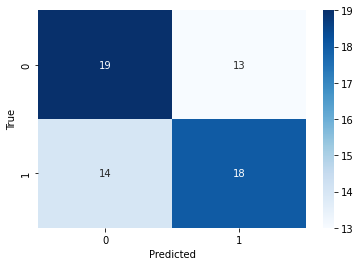

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [51]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.578125
